# Polynomial Regression and K-Nearest Neighbours in R

In this notebook, we will perform the following tasks:

1. **Polynomial Regression Models**: Fit polynomial regression models for predicting 'mpg' based on 'horsepower' and visualize the fits.
2. **Model Selection using Cross-Validation**: Compare polynomial regression models of different orders and identify the best model based on cross-validated test error.
3. **K-Nearest Neighbours Classification**: Apply the KNN model to classify 'origin' using 'horsepower' and 'weight' as inputs, and compare the predictions graphically.

Let's get started!

## Setup

First, we need to install and load the necessary packages.

In [1]:
# Install necessary packages if not already installed
if(!require(ISLR)) install.packages("ISLR", dependencies=TRUE)
if(!require(ggplot2)) install.packages("ggplot2", dependencies=TRUE)
if(!require(caret)) install.packages("caret", dependencies=TRUE)
if(!require(class)) install.packages("class", dependencies=TRUE)

# Load the libraries
library(ISLR)
library(ggplot2)
library(caret)
library(class)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Cargando paquete requerido: ggplot2

Cargando paquete requerido: caret

Cargando paquete requerido: lattice

Cargando paquete requerido: class



## Load the Data

We will use the `Auto` dataset from the `ISLR` package.

In [2]:
# Load the Auto dataset
data("Auto")

# View the first few rows of the dataset
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


## Task 1: Polynomial Regression Models

### Visualize the Data

First, let's visualize the relationship between 'mpg' and 'horsepower'.

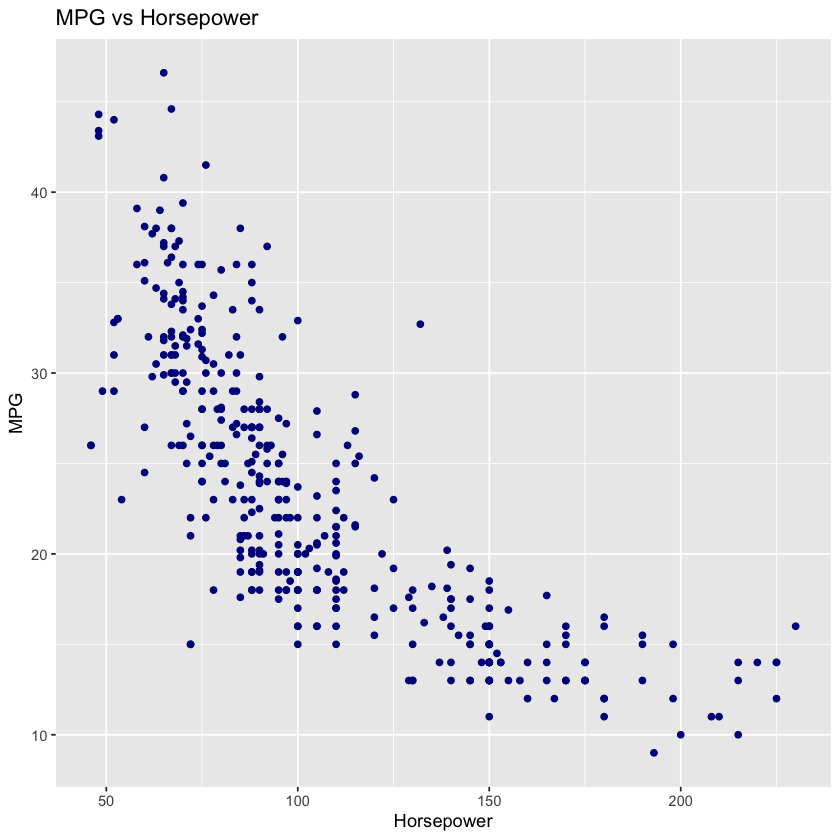

In [3]:
# Plot mpg vs horsepower
ggplot(Auto, aes(x=horsepower, y=mpg)) +
  geom_point(color='darkblue') +
  labs(title="MPG vs Horsepower", x="Horsepower", y="MPG")

### Fit Polynomial Regression Models

We will fit polynomial regression models of degrees 1 to 5.

In [6]:
# Fit polynomial regression models of degrees 1 to 5
degrees <- 1:5
models <- list()

for (d in degrees) {
  formula <- as.formula(paste("mpg ~ poly(horsepower, ", d, ", raw=TRUE)", sep=""))
  model <- lm(formula, data=Auto)
  models[[d]] <- model
}

### Plot the Fits

Now, let's plot the fitted models along with the data.


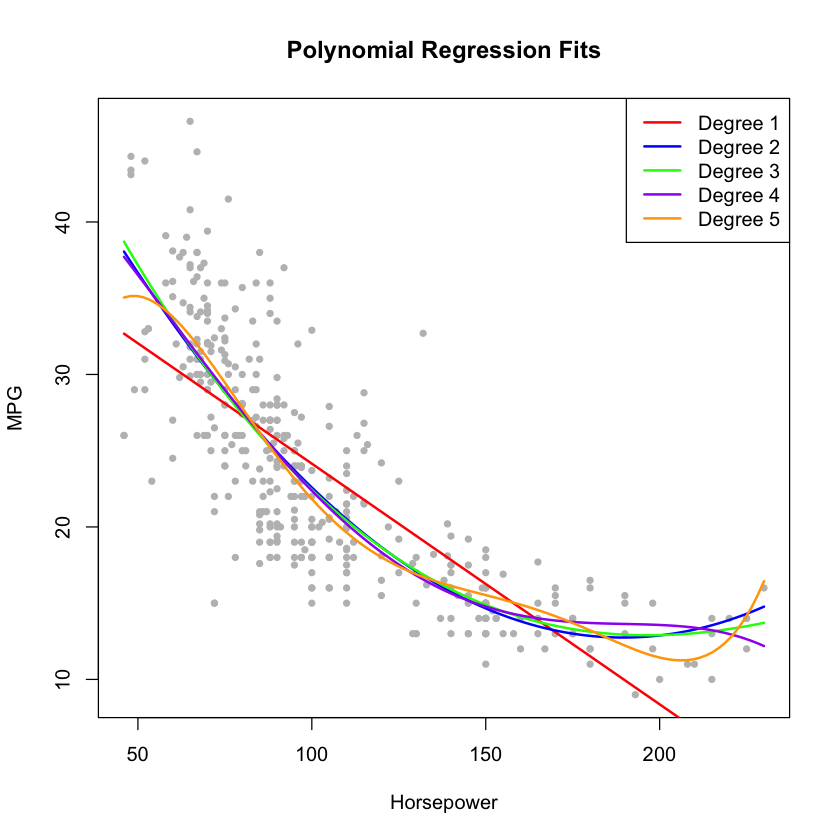

In [8]:
# Create a sequence of horsepower values for plotting
horsepower_grid <- seq(min(Auto$horsepower), max(Auto$horsepower), length=100)

# Plot the data and the fitted models
plot(Auto$horsepower, Auto$mpg, pch=20, col="grey", xlab="Horsepower", ylab="MPG", main="Polynomial Regression Fits")

colors <- c("red", "blue", "green", "purple", "orange")
for (d in degrees) {
  model <- models[[d]]
  pred <- predict(model, newdata=data.frame(horsepower=horsepower_grid))
  lines(horsepower_grid, pred, col=colors[d], lwd=2)
}

legend("topright", legend=paste("Degree", degrees), col=colors, lwd=2)


## Task 2: Model Selection using Cross-Validation
We will use 10-fold cross-validation to estimate the test error for each model and identify the best polynomial degree.

### Perform Cross-Validation

In [13]:
# Set up cross-validation
set.seed(123)
train_control <- trainControl(method="cv", number=10)

cv_errors <- c()

for (d in degrees) {
  # Define the model formula
  formula <- as.formula(paste("mpg ~ poly(horsepower, ", d, ", raw=TRUE)", sep=""))
  
  # Train the model using cross-validation
  model_cv <- train(formula, data=Auto, method="lm", trControl=train_control)
  
  # Extract the cross-validated RMSE
  cv_errors[d] <- model_cv$results$RMSE
}

# Print the cross-validated errors
cv_errors

[1] 4.857287 4.336743 4.369569 4.344256 4.321006

### Plot Cross-Validated Errors

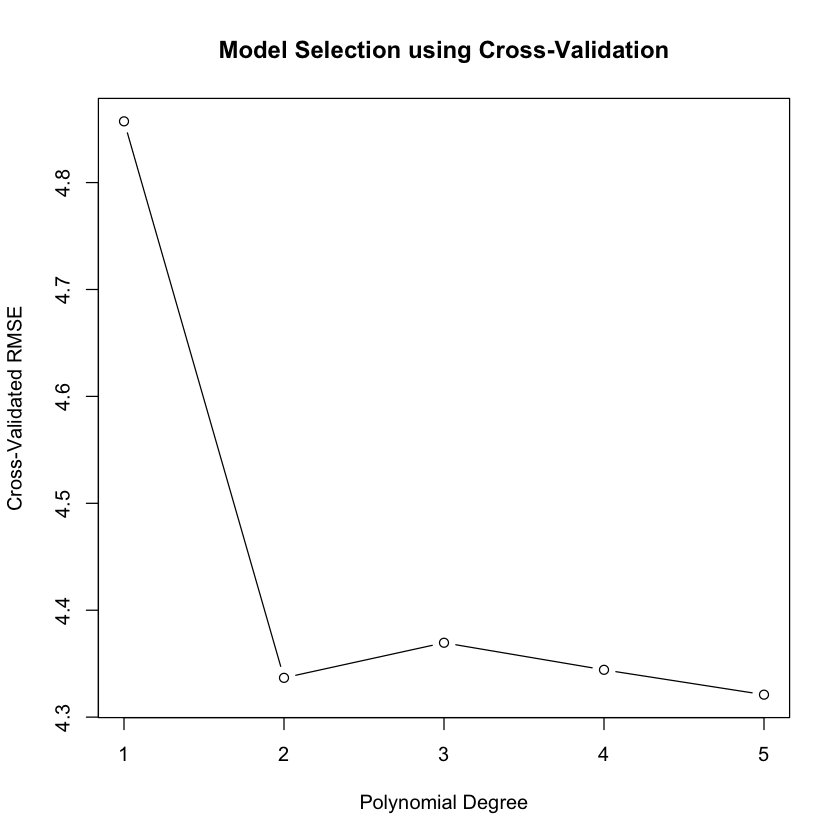

In [16]:
# Plot the CV errors
plot(degrees, cv_errors, type='b', xlab='Polynomial Degree', ylab='Cross-Validated RMSE', main='Model Selection using Cross-Validation')

### Identify the Best Model

In [19]:
best_degree <- degrees[which.min(cv_errors)]
cat("The best model is of degree:", best_degree, "with RMSE:", min(cv_errors), "\n")


The best model is of degree: 5 with RMSE: 4.321006 


**Conclusion**: The polynomial regression model of degree **5** has the lowest cross-validated RMSE and is thus selected as the best model.

## Task 3: K-Nearest Neighbours Classification

### Data Preparation

First, we will prepare the data by converting 'origin' to a factor and splitting the data into training and test sets.

In [24]:
# Convert 'origin' to factor
Auto$origin <- as.factor(Auto$origin)

# Split data into training and test sets
set.seed(123)
train_index <- createDataPartition(Auto$origin, p=0.7, list=FALSE)
train_data <- Auto[train_index, ]
test_data <- Auto[-train_index, ]

# Prepare the inputs and target variables
train_X <- train_data[, c("horsepower", "weight")]
test_X <- test_data[, c("horsepower", "weight")]
train_Y <- train_data$origin
test_Y <- test_data$origin

### Train KNN Models with Different k Values

We will train KNN models with k values of 1, 5, 10, and 15.

In [26]:
k_values <- c(1, 5, 10, 15)
predictions <- list()

for (k in k_values) {
  pred <- knn(train = train_X, test = test_X, cl = train_Y, k = k)
  predictions[[as.character(k)]] <- pred
}

### Plot True Labels

Let's first visualize the test data with true 'origin' labels.

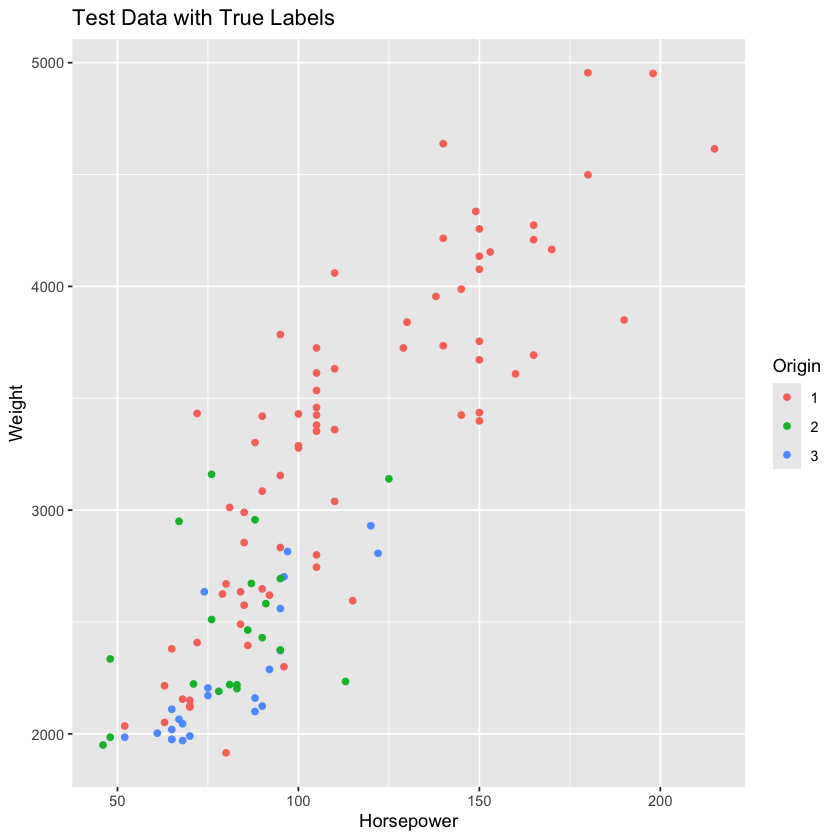

In [28]:
# Plot the test data with true labels
ggplot(test_data, aes(x=horsepower, y=weight, color=origin)) +
  geom_point() +
  labs(title="Test Data with True Labels", x="Horsepower", y="Weight", color="Origin")

### Plot KNN Predictions

Now, we will create scatter plots for each k value with points labeled by the predicted 'origin'.

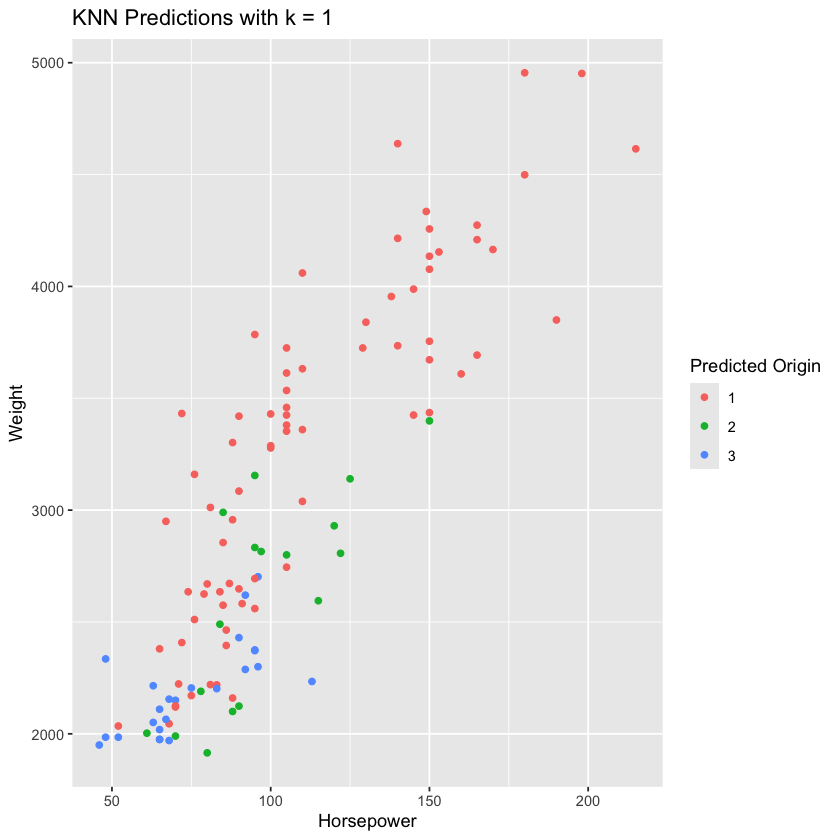

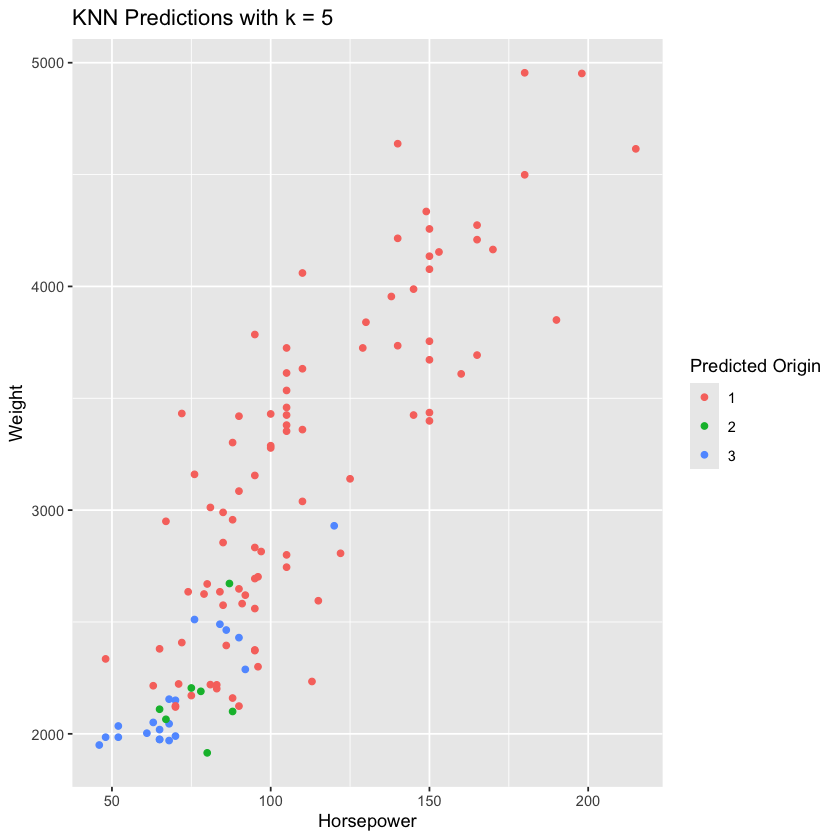

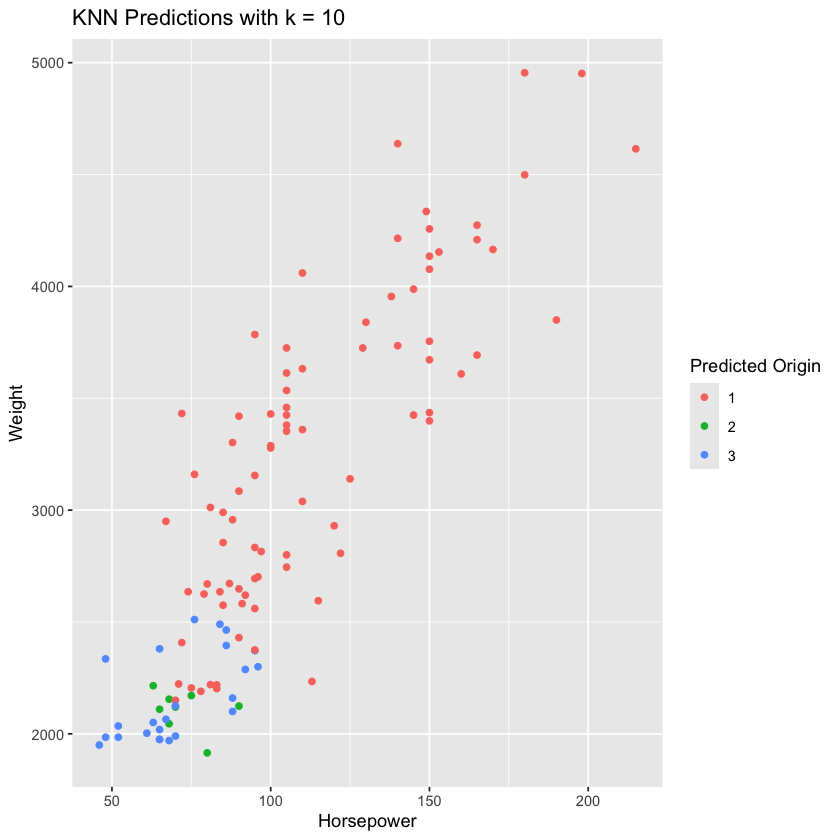

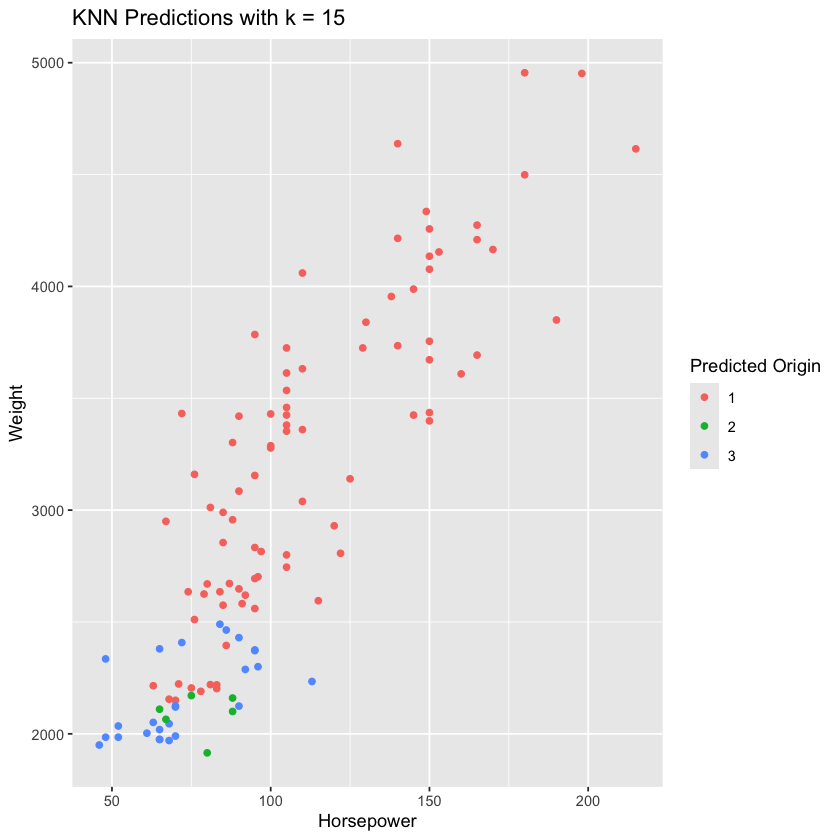

In [32]:
for (k in k_values) {
  pred_labels <- predictions[[as.character(k)]]
  plot_title <- paste("KNN Predictions with k =", k)
  p <- ggplot(test_data, aes(x=horsepower, y=weight, color=pred_labels)) +
    geom_point() +
    labs(title=plot_title, x="Horsepower", y="Weight", color="Predicted Origin")
  print(p)
}

## Conclusion

In this notebook, we:

- Fitted polynomial regression models of degrees 1 to 5 and visualized the fits.
- Used cross-validation to select the best polynomial model, which was of degree 3.
- Applied KNN classification to predict 'origin' using 'horsepower' and 'weight' and visualized the predictions for different k values.

**Note**: The visualizations help us understand how the choice of model complexity (degree of polynomial or k in KNN) affects the fit and predictions on the data.